## GROUP 15 ITCS 6100
## DOMAIN: HEALTH
### PROJECT NAME: COVID-19 DATA LAKE
## GROUP MEMBERS:
##### 1.MRUNAL TILEKAR - 801257239

##### 2.PRATHEEKA THUMMALA - 801255442

##### 3.SHIVANJANI PATHIPAKA - 801259672

##### 4.SREELEKHA PASIKANTI - 801209427

##### 5.VINEELA PUNURU - 801263256

### IMPORTING REQUIRED PACKAGES AND LIBRARIES

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
std=StandardScaler()

In [70]:
df=pd.read_csv('df2.csv')
df
df.drop(['Unnamed: 0'],axis=1)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,split
0,20201231,AK,45461.000000,0.000000,0.000000,0.000000,totalTestsViral,1275750.000000,79.000000,1023.000000,...,2,495,0,45461,8658,45461,3,6,18bb857b8a2fc5bcd9e182d9566a2d76a9e0a44d,-0.450937
1,20201231,AS,0.000000,0.000000,2140.000000,0.000000,totalTestsViral,2140.000000,0.000000,0.000000,...,60,0,0,2140,0,2140,0,0,10ea2cab531214247d5fefd53d06cd16f7098839,-0.379759
2,20201231,DC,28983.000000,0.000000,0.000000,0.000000,totalTestEncountersViral,897439.000000,234.000000,0.000000,...,11,225,0,28983,4675,28983,6,0,c17d13a8e822d921072e1e04198ec555abaf8cb0,0.321564
3,20201231,DE,57456.000000,2344.000000,452629.000000,0.000000,totalTestEncountersViral,978204.000000,411.000000,0.000000,...,10,860,1747,510085,5648,510085,5,0,126c7294cfd2ac03e5671ba18c376a25fdb53ef3,0.273508
4,20201231,GU,7317.000000,178.000000,88875.000000,0.000000,posNeg,96192.000000,14.000000,0.000000,...,66,9,242,96192,251,96192,1,0,efd776c86d6740b11f7ca3521554484d7cf9fb2a,0.815278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12177,20200117,WA,0.000000,0.000000,0.000000,0.000000,totalTestEncountersViral,0.000000,0.000000,0.000000,...,53,0,0,0,0,0,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,-0.113272
12178,20200116,WA,0.000000,0.000000,0.000000,0.000000,totalTestEncountersViral,0.000000,0.000000,0.000000,...,53,0,0,0,0,0,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,-0.780938
12179,20200115,WA,0.000000,0.000000,0.000000,0.000000,totalTestEncountersViral,0.000000,0.000000,0.000000,...,53,0,0,0,0,0,0,0,4987e61aad88182abfe641033b597304c2153d4f,-1.966126
12180,20200114,WA,0.000000,0.000000,0.000000,0.000000,totalTestEncountersViral,0.000000,0.000000,0.000000,...,53,0,0,0,0,0,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,-0.737391


In [71]:
#Changed datatype for datewise analysis
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

### DATEWISE ANALYSIS

In [72]:
datewise=df.groupby(["date"]).agg({"positive":'sum',"recovered":'sum',"death":'sum'})

In [73]:
print("Basic Information")
print("Total number of positive Cases: ",datewise["positive"].iloc[-1])
print("Total number of Recovered Cases: ",datewise["recovered"].iloc[-1])
print("Total number of Deaths Cases: ",datewise["death"].iloc[-1])
print("Total number of Active Cases: ",(datewise["positive"].iloc[-1]-datewise["recovered"].iloc[-1]-datewise["death"].iloc[-1]))
print("Total number of Closed Cases: ",datewise["recovered"].iloc[-1]+datewise["death"].iloc[-1])
print("Approximate number of positive Cases per Day: ",np.round(datewise["positive"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day: ",np.round(datewise["recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day: ",np.round(datewise["death"].iloc[-1]/datewise.shape[0]))
print("Approximate number of positive Cases per hour: ",np.round(datewise["positive"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour: ",np.round(datewise["recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour: ",np.round(datewise["death"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of positive Cases in last 24 hours: ",datewise["positive"].iloc[-1]-datewise["positive"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["recovered"].iloc[-1]-datewise["recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["death"].iloc[-1]-datewise["death"].iloc[-2])

Basic Information
Total number of positive Cases:  1702821.0
Total number of Recovered Cases:  736766.0
Total number of Deaths Cases:  23778.0
Total number of Active Cases:  942277.0
Total number of Closed Cases:  760544.0
Approximate number of positive Cases per Day:  4810.0
Approximate number of Recovered Cases per Day:  2081.0
Approximate number of Death Cases per Day:  67.0
Approximate number of positive Cases per hour:  200.0
Approximate number of Recovered Cases per hour:  87.0
Approximate number of Death Cases per hour:  3.0
Number of positive Cases in last 24 hours:  266857.0
Number of Recovered Cases in last 24 hours:  71063.0
Number of Death Cases in last 24 hours:  4036.0


### DISTRIBUTION FOR DATEWISE ANALYSIS

In [74]:
fig=px.bar(x=datewise.index,y=datewise["positive"]-datewise["recovered"]-datewise["death"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [75]:
fig=px.bar(x=datewise.index,y=datewise["recovered"]+datewise["death"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [76]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"],
                    mode='lines+markers',
                    name='Positive Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [77]:
datewise["Mortality Rate"]=(datewise["death"]/datewise["positive"])*100
datewise["Recovery Rate"]=(datewise["recovered"]/datewise["positive"])*100
datewise["Active Cases"]=datewise["positive"]-datewise["recovered"]-datewise["death"]
datewise["Closed Cases"]=datewise["recovered"]+datewise["death"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["recovered"]/datewise["positive"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["death"]/datewise["positive"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 2.9434361369668935
Median Mortality Rate 2.5151286904472547
Average Recovery Rate 26.81537330041721
Median Recovery Rate 32.548580206256226


In [78]:
print("Average increase in number of Positive Cases every day: ",np.round(datewise["positive"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["death"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["positive"].diff().fillna(0),mode='lines+markers',
                    name='Positive Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Positive Cases every day:  4810.0
Average increase in number of Recovered Cases every day:  2081.0
Average increase in number of Deaths Cases every day:  67.0


In [79]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["positive"]-datewise["recovered"]-datewise["death"])/(datewise["positive"]-datewise["recovered"]-datewise["death"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["recovered"]+datewise["death"])/(datewise["recovered"]+datewise["death"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

### Statewise Analysis

In [80]:
statewise=df[df["date"]==df["date"].max()].groupby(["state"]).agg({"totalTestsViral":'sum',"positiveTestsViral":'sum',
                                                                     "negativeTestsViral":'sum'}).sort_values(["totalTestsViral"],ascending=False)
statewise["posprecentviral"]=(statewise["positiveTestsViral"]/statewise["totalTestsViral"])*100
statewise["negprecentviral"]=(statewise["negativeTestsViral"]/statewise["totalTestsViral"])*100

In [81]:
grouped_state=df.groupby(["state","date"]).agg({"totalTestsViral":'sum',"positiveTestsViral":'sum',"negativeTestsViral":'sum'})

In [82]:
state_last_24_pos=[]
state_last_24_neg=[]
state_last_24_total=[]

for state in statewise.index:
    state_last_24_total.append((grouped_state.loc[state].iloc[-1]-grouped_state.loc[state].iloc[-2])["totalTestsViral"])
    state_last_24_pos.append((grouped_state.loc[state].iloc[-1]-grouped_state.loc[state].iloc[-2])["positiveTestsViral"])
    state_last_24_neg.append((grouped_state.loc[state].iloc[-1]-grouped_state.loc[state].iloc[-2])["negativeTestsViral"])

In [83]:
Last_24_Hours_state=pd.DataFrame(list(zip(statewise.index,state_last_24_total,
                                          state_last_24_pos,state_last_24_neg)),
                                   columns=["State Name","Last 24 Hours positiveTestsViral",
                                            "Last 24 Hours negativeTestsViral","Last 24 Hours totalTestsViral"])

Text(0.5, 1.0, 'Top 15 States with Highest Number of NegativeTestsViral in Last 24 Hours')

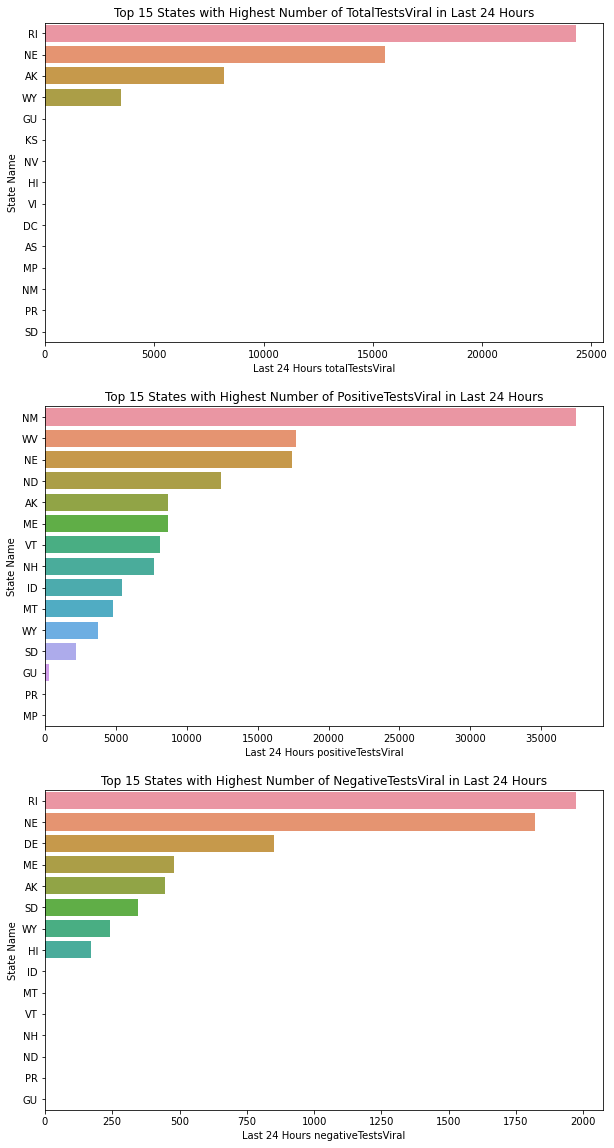

In [84]:
Top_15_Total_24hr=Last_24_Hours_state.sort_values(["Last 24 Hours totalTestsViral"],ascending=False).head(15)
Top_15_Positive_24hr=Last_24_Hours_state.sort_values(["Last 24 Hours positiveTestsViral"],ascending=False).head(15)
Top_15_Negative_24hr=Last_24_Hours_state.sort_values(["Last 24 Hours negativeTestsViral"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Total_24hr["Last 24 Hours totalTestsViral"],y=Top_15_Total_24hr["State Name"],ax=ax1)
ax1.set_title("Top 15 States with Highest Number of TotalTestsViral in Last 24 Hours")
sns.barplot(x=Top_15_Positive_24hr["Last 24 Hours positiveTestsViral"],y=Top_15_Positive_24hr["State Name"],ax=ax2)
ax2.set_title("Top 15 States with Highest Number of PositiveTestsViral in Last 24 Hours")
sns.barplot(x=Top_15_Negative_24hr["Last 24 Hours negativeTestsViral"],y=Top_15_Negative_24hr["State Name"],ax=ax3)
ax3.set_title("Top 15 States with Highest Number of NegativeTestsViral in Last 24 Hours")

In [85]:
no_recovered_states=statewise[(statewise["negativeTestsViral"]==0)][["totalTestsViral","positiveTestsViral"]]
no_recovered_states["positivetest"]=(no_recovered_states["positiveTestsViral"]/no_recovered_states["totalTestsViral"])*100
no_recovered_states=no_recovered_states[no_recovered_states["positivetest"]>0].sort_values(["positivetest"],ascending=False)
no_recovered_states.style.background_gradient('Reds')


,totalTestsViral,positiveTestsViral,positivetest
state,,,
HI,0.000000,21233.000000,inf
DE,0.000000,59007.000000,inf
SD,594876.000000,95731.000000,16.092597
ME,1085982.000000,24418.000000,2.248472


In [86]:
fig=go.Figure()
for state in statewise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_state.loc[state].index, 
                             y=grouped_state.loc[state]["totalTestsViral"].rolling(window=7).mean().diff(),
                    mode='lines',name=state))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Total Tests Viral",
                 xaxis_title="Date",yaxis_title="Total Tests",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [87]:
fig=go.Figure()
for state in statewise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_state.loc[state].index, 
                             y=grouped_state.loc[state]["positiveTestsViral"].rolling(window=7).mean().diff(),
                    mode='lines',name=state))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Positive Tests Viral",
                 xaxis_title="Date",yaxis_title="Positive Tests",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [88]:
fig=go.Figure()
for state in statewise.head(10).index:
    fig.add_trace(go.Scatter(x=grouped_state.loc[state].index, 
                             y=grouped_state.loc[state]["negativeTestsViral"].rolling(window=7).mean().diff(),
                    mode='lines',name=state))
fig.update_layout(height=600,title="7 Days Rolling Average of Daily increase of Negative Tests Viral",
                 xaxis_title="Date",yaxis_title="Negative Tests",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Clustering Analysis

In [91]:
X=statewise[["posprecentviral","negprecentviral"]]

statewise["negprecentviral"].replace([np.inf, -np.inf], np.nan, inplace=True)
statewise["negprecentviral"] =statewise["negprecentviral"] .fillna(0)

statewise["posprecentviral"].replace([np.inf, -np.inf], np.nan, inplace=True)
statewise["posprecentviral"] =statewise["posprecentviral"] .fillna(0)
# print(X)
# Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [92]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

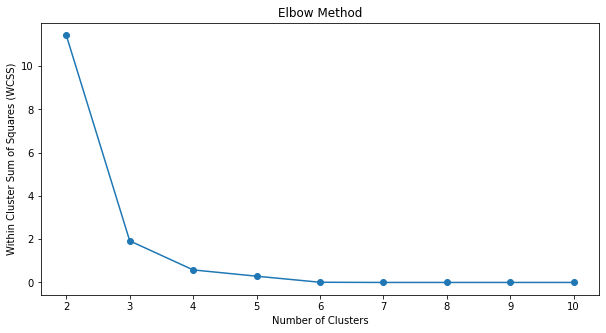

In [93]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

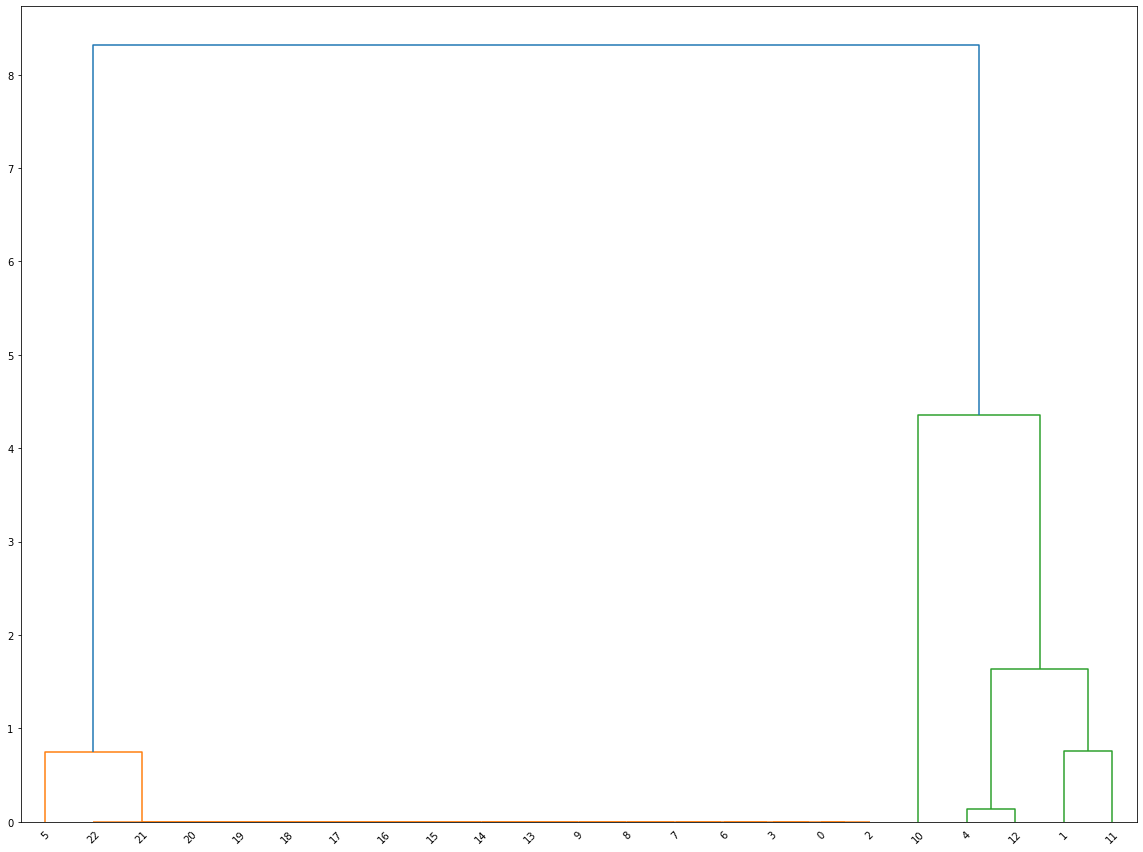

In [94]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [95]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

statewise["Clusters"]=clf_final.predict(X)

cluster_summary=pd.concat([statewise[statewise["Clusters"]==1].head(15),statewise[statewise["Clusters"]==2].head(15),statewise[statewise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}")

,totalTestsViral,positiveTestsViral,negativeTestsViral,posprecentviral,negprecentviral,Clusters
state,,,,,,
NM,1970212.00,0.00,0.00,0.00,0.00,1.00
WV,1494681.00,0.00,0.00,0.00,0.00,1.00
ND,1313560.00,0.00,0.00,0.00,0.00,1.00
ME,1085982.00,24418.00,0.00,2.25,0.00,1.00
NH,1032929.00,0.00,0.00,0.00,0.00,1.00
ID,855567.00,0.00,0.00,0.00,0.00,1.00
MT,791589.00,0.00,0.00,0.00,0.00,1.00
VT,697705.00,0.00,0.00,0.00,0.00,1.00
GU,96014.00,0.00,0.00,0.00,0.00,1.00


### ANALYSIS for the STATE NC

In [96]:
nc_data=df[df["state"]=="NC"]
datewise_nc=nc_data.groupby(["date"]).agg({"positive":'sum',"recovered":'sum',"death":'sum'})
print(datewise_nc.iloc[-1])
print("Total Active Cases: ",datewise_nc["positive"].iloc[-1]-datewise_nc["recovered"].iloc[-1]-datewise_nc["death"].iloc[-1])
print("Total Closed Cases: ",datewise_nc["recovered"].iloc[-1]+datewise_nc["death"].iloc[-1])

positive    193581.000000
recovered        0.000000
death         3243.000000
Name: 2020-09-20 00:00:00, dtype: float64
Total Active Cases:  190338.0
Total Closed Cases:  3243.0


In [97]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_nc.index, y=datewise_nc["positive"],
                    mode='lines+markers',
                    name='Positive Cases'))
fig.add_trace(go.Scatter(x=datewise_nc.index, y=datewise_nc["recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_nc.index, y=datewise_nc["death"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in NC",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [98]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_nc.index, y=datewise_nc["positive"].diff().fillna(0),
                    mode='lines+markers',
                    name='Positive Cases'))
fig.add_trace(go.Scatter(x=datewise_nc.index, y=datewise_nc["recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_nc.index, y=datewise_nc["death"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in NC",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

### Linear Regression

In [99]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [100]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [101]:
lin_reg=LinearRegression(normalize=True)

In [102]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["death"]).reshape(-1,1))

LinearRegression(normalize=True)

In [103]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

### Evaluation: Regression Metric

In [104]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["death"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["death"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  33926.38470315816


In [105]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',name="Train Data for Deaths"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Deaths",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### Polynomial Regression

In [106]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [107]:
poly = PolynomialFeatures(degree = 8) 

In [108]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["death"]

In [109]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

### Evaluation: Regression Metric

In [110]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["death"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  71801.53111957577


In [111]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',name="Train Data for Deaths"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Deaths",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### SVM Regression

In [112]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [113]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [114]:
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [115]:
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["death"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [116]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

### Evaluation: Regression Metric

In [117]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["death"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["death"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  13422.698785230787


In [118]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["death"],
                    mode='lines+markers',name="Train Data for Deaths"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Deaths",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

### RESULTS

In [119]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [120]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2021-01-01,59267.191442,163603.972460,37975.104543
1,2021-01-02,59430.573756,175485.504918,38105.816708
2,2021-01-03,59593.956070,188090.446649,38238.382911
3,2021-01-04,59757.338384,201449.990464,38372.824132
4,2021-01-05,59920.720698,215596.320513,38509.161527


### CONCLUSION

We analysed our data using 3 different ML models, linear regression, polynomial regression and SVM regression. From the value generated, we think for our data set polynomial regression model is best suited according to parameters provided. For evaluation, we analysed data using root mean square error. For our data set, polynomial regression gave us minimum RMS error.